The goal of this notebook is to analyse the historical weather data to figure out the best vacation dates.\
Data is taken from https://www.wetterkontor.de/

In [1]:
import pandas as pd
import numpy as np
import os
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context(font_scale=1.5, context='paper')
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Paths

In [2]:
os.chdir('..')

In [3]:
DATA_DIR = Path('data')
temperature_dir = DATA_DIR / 'temperature'
precipitation_dir = DATA_DIR / 'precipitation'

# Temperature

## Load data

In [9]:
temperature_file_paths = list(temperature_dir.glob("*"))
temperature_files = [pd.read_csv(p) for p in temperature_file_paths]
temperature_files = pd.concat(temperature_files, keys=np.arange(len(temperature_files)))
years = temperature_files.category.index.get_level_values(0) + 2016
temperature_files = temperature_files.rename(columns={'category': 'date'})
temperature_files

date  Höchstwert  Tiefstwert  Mittelwert
0 0   Di 07.05.        14.4        -1.4         6.2
  1   Mi 08.05.        16.0         1.0         9.4
  2   Do 09.05.        15.2         2.0         9.7
  3   Fr 10.05.        15.2         7.2        10.5
  4   Sa 11.05.        12.0         5.2         8.9
...         ...         ...         ...         ...
7 51  Mo 27.06.        20.7        11.7        15.9
  52  Di 28.06.        25.3        12.0        18.7
  53  Mi 29.06.        24.2        13.3        18.8
  54  Do 30.06.        22.1        14.5        17.8
  55  Fr 01.07.        26.1        12.8        19.7

[448 rows x 4 columns]

## Process

In [51]:
# reshape the data
df = temperature_files.melt(id_vars='date', var_name='variable', value_name='temperature', ignore_index=False)
df = df.reset_index(level=0).rename(columns={'level_0': 'year'})
df.variable = df.variable.map(dict(zip(['Höchstwert', 'Mittelwert', 'Tiefstwert'], ['Highest', 'Mean', 'Lowest'])))
df.year += 2015
dt = (df.date + "2023").str.split(expand=True)[1]
df['datetime'] = pd.to_datetime(dt, format="%d.%m.%Y")
df = df.reset_index(drop=True)
df = df.sort_values('datetime')
df_temp = df

## Plot

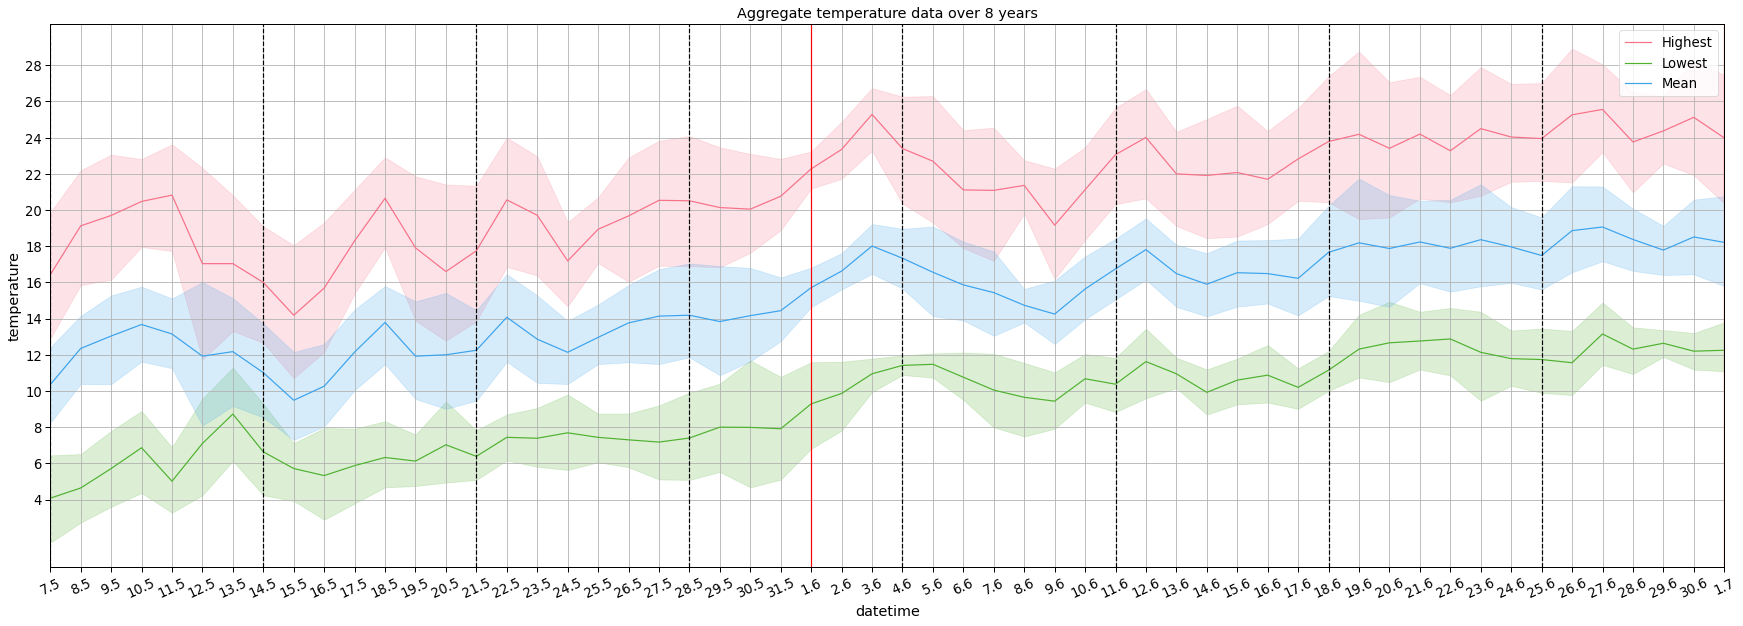

In [46]:
plt.figure(figsize=(30, 10))
sns.lineplot(x='datetime', y='temperature', hue='variable', data=df, markers=True, dashes=True, legend=True, palette='husl')
plt.title(f'Aggregate temperature data over {df.year.nunique()} years')
plt.xticks(rotation=25)
plt.yticks(np.arange(4, 29, 2))
plt.grid(True, axis='both')

plt.xlim(df.datetime.unique()[0], df.datetime.unique()[-1])
plt.xticks(df.datetime.dt.date.astype(str).unique(), labels=(df.datetime.dt.day.astype(str) + '.' + df.datetime.dt.month.astype(str)).unique())

# Add vertical lines for week start
for date in df[df.datetime.dt.day_of_week == 6].datetime.unique():
    plt.axvline(date, color='k', linestyle='--')
    
# Add vertical lines for month
for date in df[df.datetime.dt.is_month_start].datetime.unique():
    plt.axvline(date, color='red', linestyle='-')

plt.legend()
plt.show()

# Precipitation

In [48]:
precipitation_file_paths = list(precipitation_dir.glob("*"))
precipitation_files = [pd.read_csv(p) for p in precipitation_file_paths]
precipitation_files = pd.concat(precipitation_files, keys=np.arange(len(precipitation_files)))
years = precipitation_files.category.index.get_level_values(0) + 2016
precipitation_files = precipitation_files.rename(columns={'category': 'date'})
precipitation_files = precipitation_files.rename(columns={'Niederschlag (6 bis 6 UTC)': 'precipitation'})
precipitation_files

date  precipitation
0 0   Do 07.05.            0.0
  1   Fr 08.05.            0.0
  2   Sa 09.05.            8.0
  3   So 10.05.            0.5
  4   Mo 11.05.           10.8
...         ...            ...
7 51  Do 27.06.            0.0
  52  Fr 28.06.            0.0
  53  Sa 29.06.            0.0
  54  So 30.06.            0.0
  55  Mo 01.07.           18.5

[448 rows x 2 columns]

## Process

In [52]:
# reshape the data
df = precipitation_files.melt(id_vars='date', value_name='precipitation', ignore_index=False)
df = df.reset_index(level=0).rename(columns={'level_0': 'year'})
df.year += 2015
dt = (df.date + "2023").str.split(expand=True)[1]
df['datetime'] = pd.to_datetime(dt, format="%d.%m.%Y")
df = df.reset_index(drop=True)
df = df.sort_values('datetime')
df_precip = df
df

C:\Users\kostya\AppData\Local\Temp\ipykernel_22836\3016862133.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = precipitation_files.melt(id_vars='date', value_name='precipitation', ignore_index=False)


,year,date,variable,precipitation,datetime
0,2015,Do 07.05.,precipitation,0.0,2023-05-07
168,2018,So 07.05.,precipitation,3.1,2023-05-07
336,2021,Mo 07.05.,precipitation,0.0,2023-05-07
224,2019,Fr 07.05.,precipitation,7.9,2023-05-07
392,2022,Di 07.05.,precipitation,0.0,2023-05-07
...,...,...,...,...,...
167,2017,Fr 01.07.,precipitation,5.8,2023-07-01
111,2016,Mi 01.07.,precipitation,0.0,2023-07-01
55,2015,Mi 01.07.,precipitation,2.6,2023-07-01
391,2021,So 01.07.,precipitation,0.0,2023-07-01


## Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


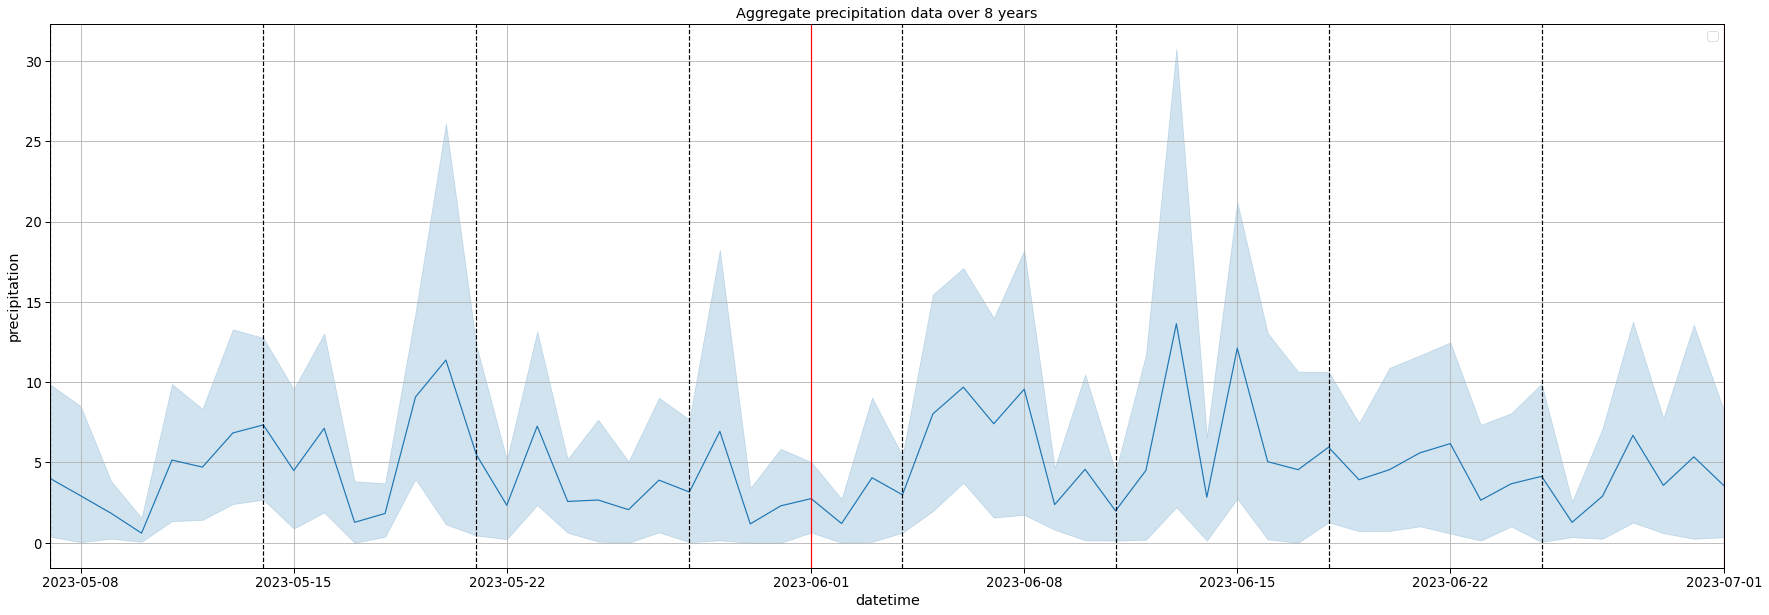

In [50]:
plt.figure(figsize=(30, 10))
sns.lineplot(x='datetime', y='precipitation', data=df, markers=True, dashes=True, legend=True, palette='husl')
plt.title(f'Aggregate precipitation data over {df.year.nunique()} years')
plt.grid(True, axis='both')

plt.xlim(df.datetime.unique()[0], df.datetime.unique()[-1])
# plt.xticks(df.datetime.dt.date.astype(str).unique(), labels=(df.datetime.dt.day.astype(str) + '.' + df.datetime.dt.month.astype(str)).unique())

# Add vertical lines for week start
for date in df[df.datetime.dt.day_of_week == 6].datetime.unique():
    plt.axvline(date, color='k', linestyle='--')
    
# Add vertical lines for month
for date in df[df.datetime.dt.is_month_start].datetime.unique():
    plt.axvline(date, color='red', linestyle='-')

plt.legend()
plt.show()

# Combined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


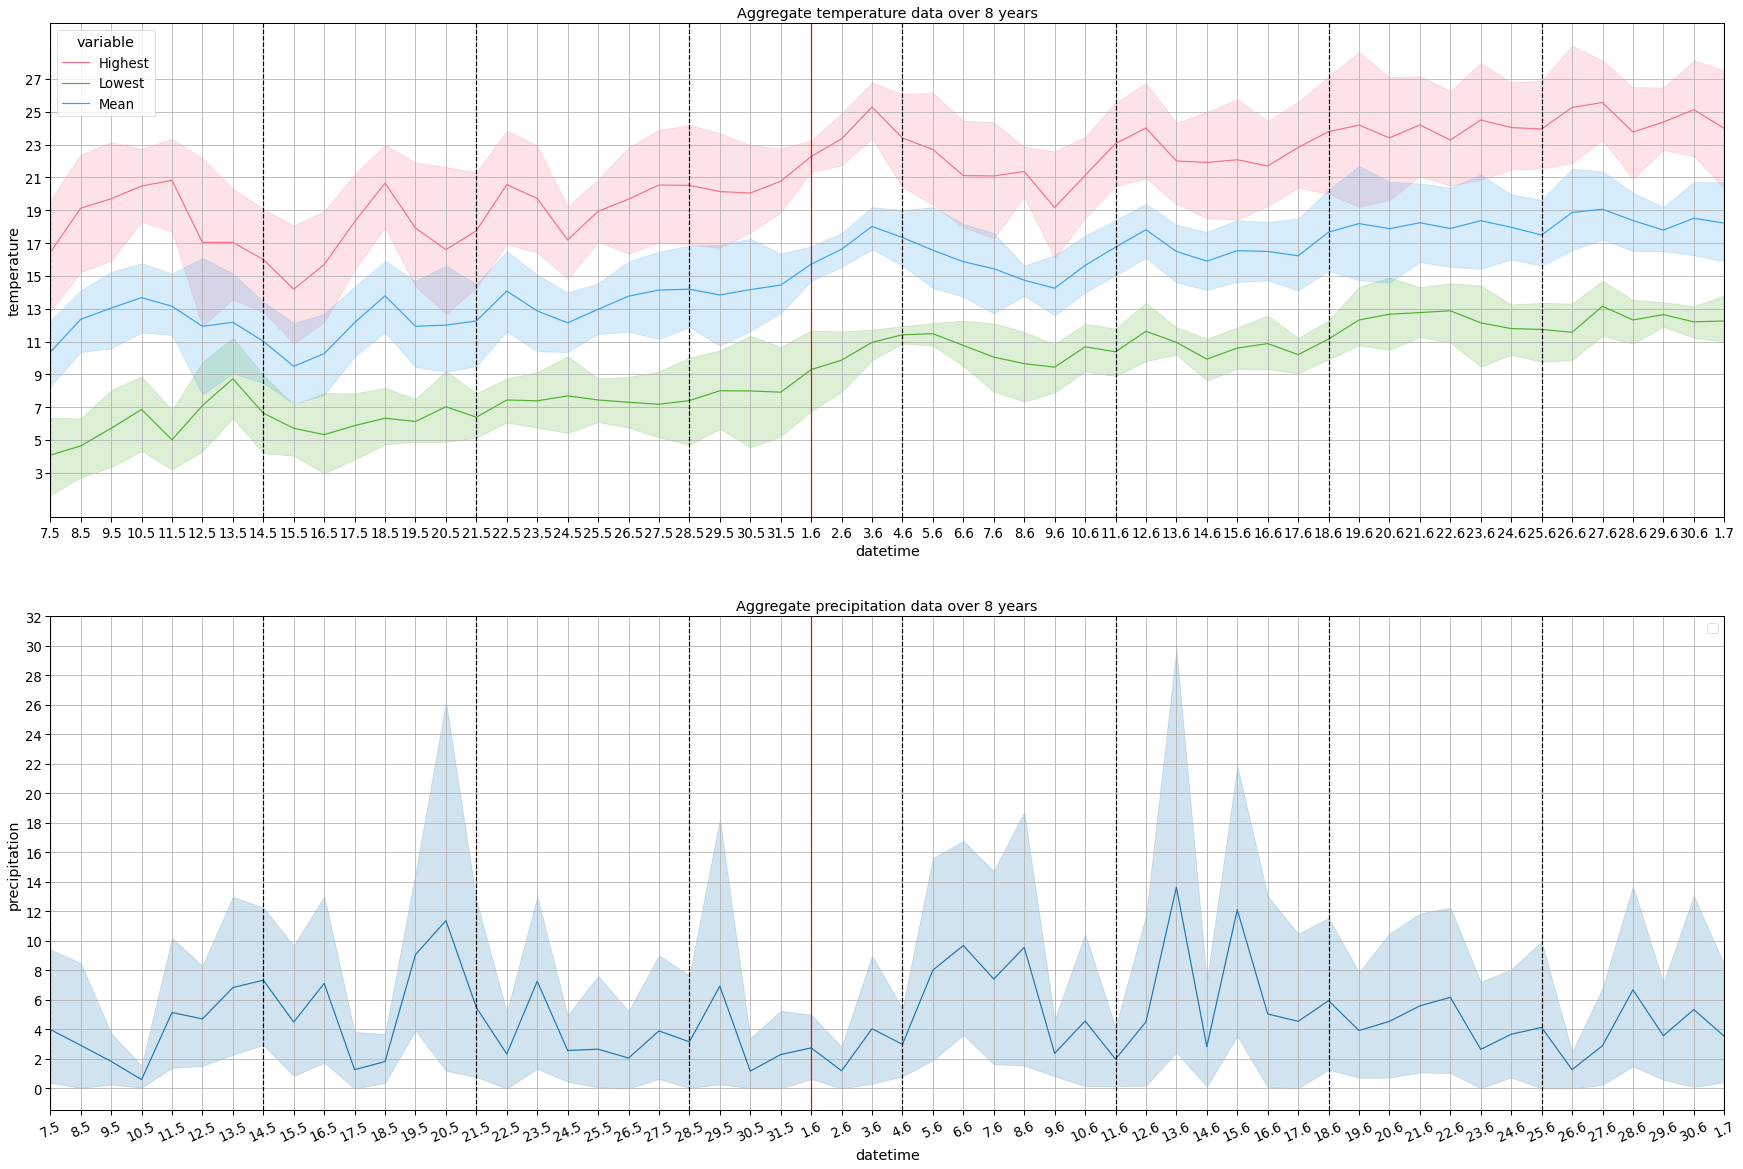

In [67]:
fig, axes = plt.subplots(2, 1, figsize=(30, 20))

sns.lineplot(x='datetime', y='temperature', hue='variable', data=df_temp, markers=True, dashes=True, legend=True, palette='husl', ax=axes[0])
axes[0].set_title(f'Aggregate temperature data over {df.year.nunique()} years')
axes[0].set_yticks(np.arange(3, 29, 2))
axes[0].set_xlim(df.datetime.unique()[0], df.datetime.unique()[-1])
axes[0].set_xticks(df.datetime.dt.date.astype(str).unique(), labels=(df.datetime.dt.day.astype(str) + '.' + df.datetime.dt.month.astype(str)).unique())
axes[0].grid(True, axis='both')
# Add vertical lines for week start
for date in df[df.datetime.dt.day_of_week == 6].datetime.unique():
    axes[0].axvline(date, color='k', linestyle='--')
# Add vertical lines for month
for date in df[df.datetime.dt.is_month_start].datetime.unique():
    axes[0].axvline(date, color='red', linestyle='-')


sns.lineplot(x='datetime', y='precipitation', data=df_precip, markers=True, dashes=True, legend=True, palette='husl', ax=axes[1])
axes[1].set_title(f'Aggregate precipitation data over {df.year.nunique()} years')
axes[1].set_yticks(np.arange(0, 33, 2))
axes[1].set_xlim(df.datetime.unique()[0], df.datetime.unique()[-1])
axes[1].set_xticks(df.datetime.dt.date.astype(str).unique(), labels=(df.datetime.dt.day.astype(str) + '.' + df.datetime.dt.month.astype(str)).unique(), rotation=25)
axes[1].grid(True, axis='both')
# Add vertical lines for week start
for date in df[df.datetime.dt.day_of_week == 6].datetime.unique():
    axes[1].axvline(date, color='k', linestyle='--')
# Add vertical lines for month
for date in df[df.datetime.dt.is_month_start].datetime.unique():
    axes[1].axvline(date, color='red', linestyle='-')

plt.legend()
plt.show()
fig.tight_layout()

In [68]:
fig.savefig('images/weather_Grainau_2015_to_2022.png')